<a href="https://colab.research.google.com/github/y-h-liao/AI_course/blob/master/20220720_DNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
! /opt/bin/nvidia-smi

Fri Jul 29 05:16:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
 (x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

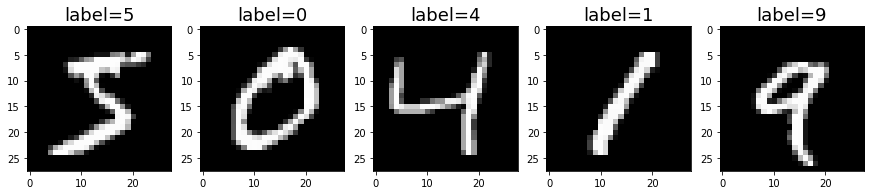

In [ ]:
#把它畫出來
#畫出MNIST

import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15,4)
for i in range(5):
  ax = plt.subplot(1,5,i+1)
  ax.imshow(x_train[i],cmap='gray') #cmap='binary'會白底黑字
  ax.set_title('label='+str(y_train[i]),fontsize=18)
plt.show()

In [ ]:
#處理資料 
#把資料轉換到0~1之間
#因為灰階值範圍是0~255

x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape((60000,28,28,1))
x_test =  x_test.reshape((10000,28,28,1))

開始建立模型

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
CNN = keras.Sequential(name="CNNNetwork") #通常用 model = keras.Sequencial()

In [ ]:
CNN.add(layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      activation = 'relu', #sigmoid 
                      padding = 'same',
                      input_shape = (28,28,1) #第一層才需要指定input_shape
                      ))

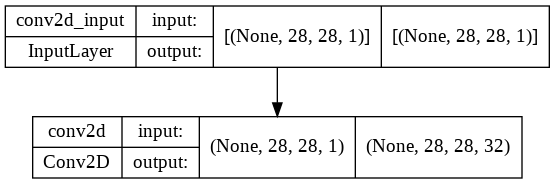

In [ ]:
keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
CNN.add(layers.MaxPool2D(2,2))

In [ ]:
CNN.add(layers.Conv2D(filters = 64,
                      kernel_size = (3,3),
                      activation = 'relu', #sigmoid 
                      padding = 'same'                      
                      ))

In [ ]:
CNN.add(layers.MaxPool2D(2,2))

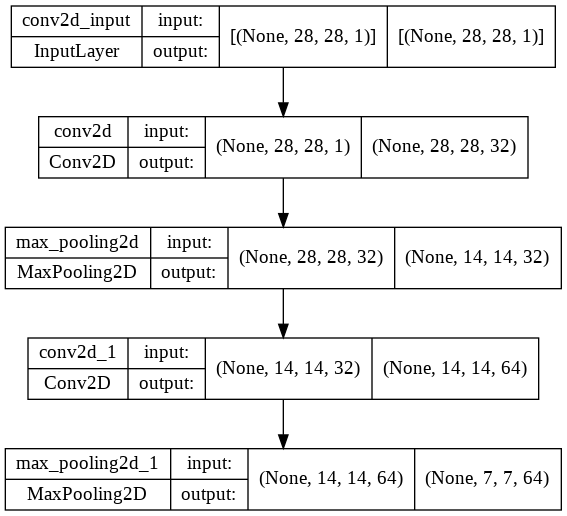

In [ ]:
keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
print(CNN.summary())

Model: "CNNNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#parm# 怎麼來的
#320 :
#filter size 3x3
#28,28,1 的 1 (channel)
#wx+b (1 bias)
#((3x3x1)+1) x 32 = 320

#18496 = ((3x3x32)+1)*64 

In [ ]:
CNN.add(layers.Flatten())

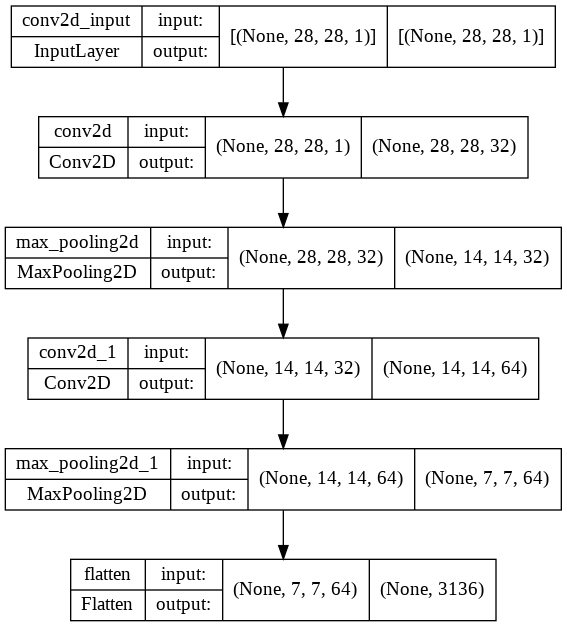

In [ ]:
keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dense(64,activation='relu'))

#輸出層
CNN.add(layers.Dense(10,activation='softmax')) #sigmoid

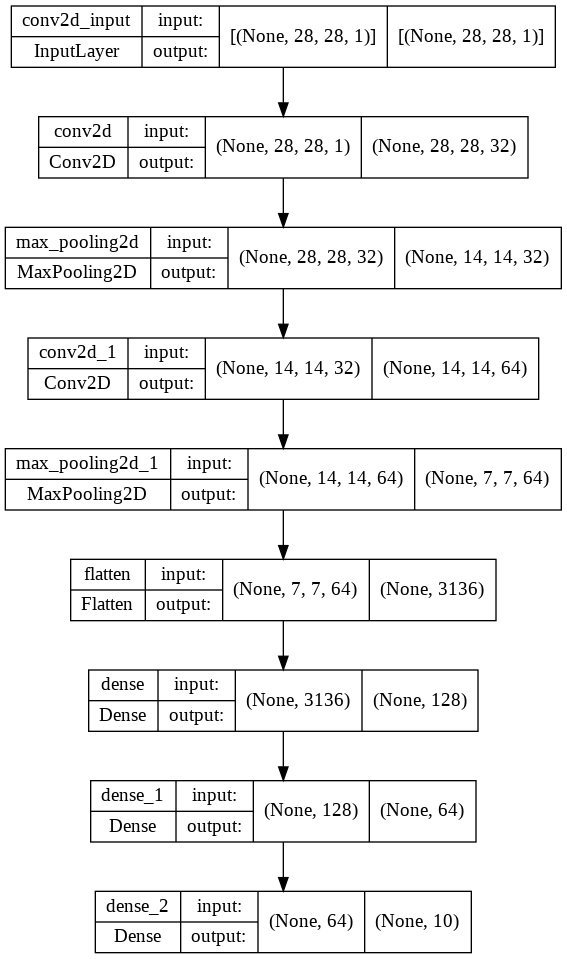

In [ ]:
keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
print(CNN.summary())

Model: "CNNNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
CNN.compile(optimizer='Adam',
            loss = keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [ ]:
train_history=CNN.fit(x=x_train,
                      y=y_train,
                      epochs = 20,
                      batch_size = 300,
                      validation_split = 0.2,
                      verbose = 2
                      )

Epoch 1/20
160/160 - 16s - loss: 0.3617 - accuracy: 0.8935 - val_loss: 0.0965 - val_accuracy: 0.9718 - 16s/epoch - 100ms/step
Epoch 2/20
160/160 - 1s - loss: 0.0802 - accuracy: 0.9752 - val_loss: 0.0661 - val_accuracy: 0.9807 - 1s/epoch - 9ms/step
Epoch 3/20
160/160 - 1s - loss: 0.0508 - accuracy: 0.9853 - val_loss: 0.0514 - val_accuracy: 0.9852 - 1s/epoch - 8ms/step
Epoch 4/20
160/160 - 1s - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0454 - val_accuracy: 0.9874 - 1s/epoch - 9ms/step
Epoch 5/20
160/160 - 1s - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0489 - val_accuracy: 0.9858 - 1s/epoch - 8ms/step
Epoch 6/20
160/160 - 1s - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0384 - val_accuracy: 0.9876 - 1s/epoch - 8ms/step
Epoch 7/20
160/160 - 1s - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0361 - val_accuracy: 0.9892 - 1s/epoch - 8ms/step
Epoch 8/20
160/160 - 1s - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0373 - val_accuracy: 0.9893 - 1s/epoch - 8ms/step
Epoch 9/20
160/160 -

In [ ]:
#overfitting

In [ ]:
#共用
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(train_history.history[show_train_value])
    plt.plot(train_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

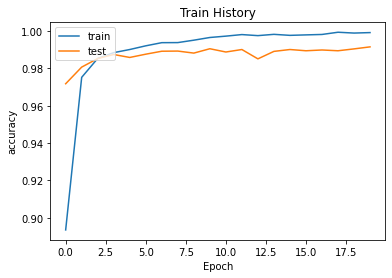

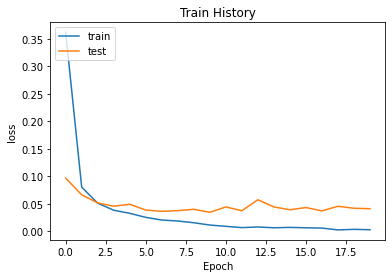

In [ ]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [ ]:
import numpy as np

In [ ]:
np.mean( np.argmax(CNN.predict(x_test), axis=-1) ==y_test )

0.992

In [ ]:
(1==1) + (2==2)

2

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
prediction = CNN.predict(x_test)

In [ ]:
prediction.shape

(10000, 10)

上面錯誤示範

In [ ]:
prediction = (np.argmax(CNN.predict(x_test), axis=-1))

In [ ]:
prediction.shape

(10000,)

In [ ]:
a = np.array([3,1,2,5,6,1])
print(np.argmax(a))
print(a[np.argmax(a)])
print(a[-2])

4
6
6


In [ ]:
b = np.array([[1,2,3,4],
              [3,4,5,7],
             [5,7,9,8]])
print(b)
print(np.argmax(b,axis=1))

[[1 2 3 4]
 [3 4 5 7]
 [5 7 9 8]]
[3 3 2]


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,1,0,0,2,0,1,2
1,0,1133,0,1,0,0,1,0,0,0
2,1,1,1024,1,0,0,1,3,0,1
3,1,0,1,1005,0,2,0,0,1,0
4,0,0,0,0,973,0,2,0,0,7
5,2,0,0,5,0,881,2,0,0,2
6,3,2,0,0,1,1,949,0,1,1
7,0,0,6,0,0,0,0,1016,1,5
8,2,0,1,0,0,0,0,1,966,4


In [ ]:
#num=10可以改
#idx代表從哪張圖開始畫
import matplotlib.pyplot as plt 
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    images = images.reshape(images.shape[0],28,28)
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10,color='red') 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

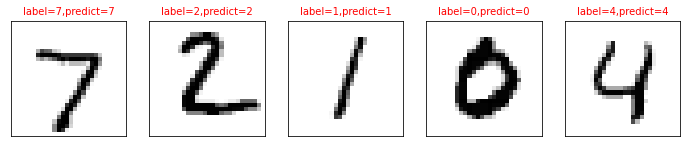

In [ ]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=0,num=5)

In [ ]:
#把答案跟預測存在Dataframe
df = pd.DataFrame({
    'label': y_test,
    'predict': prediction
})

In [ ]:
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
df [ (df.label==5) & (df.predict==3) ]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


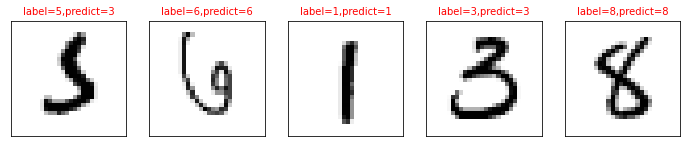

In [ ]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=340,num=5)